In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [5]:
#Reading fact_bookings.csv file

df_book = pd.read_csv("Datasets/fact_bookings.csv")

In [4]:
df_book.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df_book.shape

(134590, 12)

In [7]:
#to remove duplicates

df_book.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_book.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [10]:
#counting unique booking platforms

df_book.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

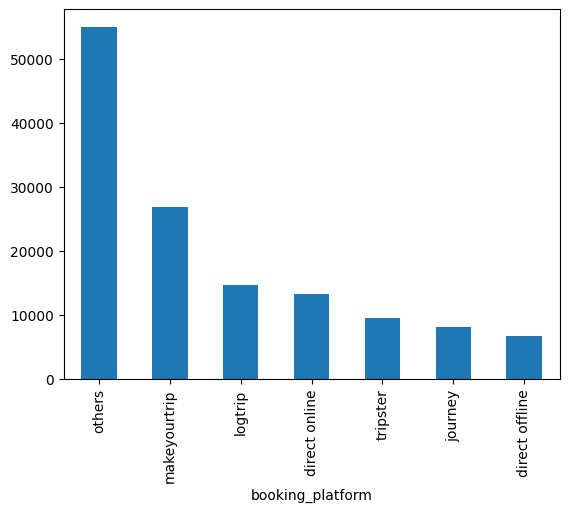

In [11]:
df_book.booking_platform.value_counts().plot(kind="bar")

In [12]:
df_book.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [13]:
#Reading dim_date.csv file
df_date = pd.read_csv('datasets/dim_date.csv')

#Reading dim_hotels.csv file
df_hotels = pd.read_csv('datasets/dim_hotels.csv')

#Reading dim_rooms.csv file
df_rooms = pd.read_csv('datasets/dim_rooms.csv')

#Reading fact_aggregated_bookings.csv file
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [ ]:
#Working on dim_hotels.csv file

In [17]:
df_hotels.shape



(25, 4)

In [16]:
df_hotels.head()



,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [15]:
df_hotels.category.value_counts()


category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

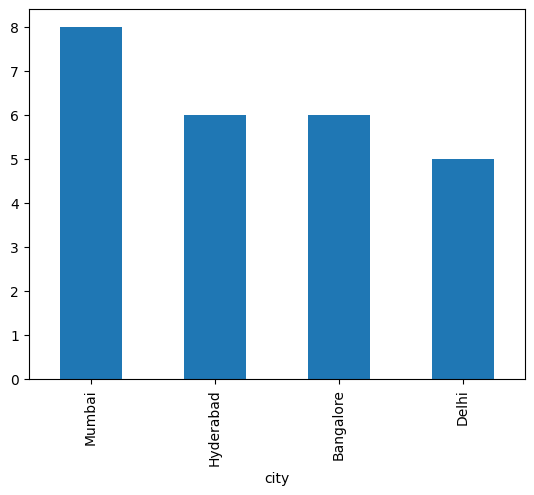

In [14]:
df_hotels.city.value_counts().plot(kind="bar")


In [ ]:
#DATA EXPLORATION

In [18]:
#Checking aggregated bookings

df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30


In [19]:
#exploring unique property ids in aggregated booking file

df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [22]:
# total bookings per property_id

df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [25]:
#Exploring days on which bookings are greater than capacity

df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [29]:
# properties that have highest capacity

df_agg_bookings.capacity.max()




np.int64(50)

In [30]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


In [ ]:
#DATA CLEANING

In [31]:
df_book.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [33]:
#Cleaning invalid data

df_book[df_book.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [39]:
#removing unwanted and invalid guests

df_bookings = df_book[df_book.no_guests>0]

In [40]:
df_bookings.shape

(134590, 12)

In [41]:
#outlier removal in the generated revenue

df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(45220))

In [42]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(14916.013188201203), np.float64(13500.0))

In [43]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [44]:
higher_limit = avg + 3*std
higher_limit

np.float64(34274.61740350578)

In [45]:
lower_limit = avg - 3*std
lower_limit

np.float64(-4442.591027103368)

In [46]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [47]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [48]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(133070, 12)

In [49]:
df_bookings.revenue_realized.describe()

count    133070.000000
mean      12468.775464
std        6537.748605
min        2600.000000
25%        7600.000000
50%       11400.000000
75%       15300.000000
max       34200.000000
Name: revenue_realized, dtype: float64

In [50]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(32082.021279985467)

In [51]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,2022-04-26,2022-05-01,2022-05-02,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,2022-04-28,2022-05-01,2022-05-03,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,2022-04-30,2022-05-01,2022-05-06,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [52]:
#all rooms are RT4 which means presidential suit.
#Now since RT4 is a luxurious room it is likely their rent will be higher. 
#To make a fair analysis,
#we need to do data analysis only on RT4 room types



df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    14553.000000
mean     22483.440390
std       8338.248282
min       7600.000000
25%      19000.000000
50%      22800.000000
75%      31350.000000
max      34200.000000
Name: revenue_realized, dtype: float64

In [53]:
# mean + 3*standard deviation
22483+3*8338

47497

In [54]:
#Here higher limit comes to be 47497 and 
#in our dataframe above we can see that max value for revenue realized is 34200. 
#Hence we can conclude that there is no outlier
#and we don't need to do any data cleaning on this particular column

In [55]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,2022-04-29,2022-05-01,2022-05-02,2,RT2,logtrip,4.0,Checked Out,12600,12600


In [56]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77054
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [57]:
#In aggregate bookings finding columns that have null values.
#Fill these null values with whatever you think
#is the appropriate subtitute (possible ways is to use mean or median)


df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [58]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [59]:
df_agg_bookings.capacity.median()

np.float64(25.0)

In [61]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-May-22,RT1,22,26
15,17563,01-May-22,RT1,21,25


In [62]:
#In aggregate bookings finding out records 
#that have successful_bookings value greater than capacity. 
#Filter those records

df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [64]:
df_agg_bookings.shape

(9200, 5)

In [63]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9200, 5)

In [ ]:
#DATA TRANSFORMATION

In [65]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30


In [66]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [67]:
#Approach to get rid of SettingWithCopyWarning


new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,0.833333
1,19562,01-May-22,RT1,28,30,0.933333
2,19563,01-May-22,RT1,23,30,0.766667


In [68]:
#Converting into percentage value

df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


In [69]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [70]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   int64  
 5   occ_pct              9200 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 431.4+ KB


In [ ]:
#INSIGHTS GENERATION

In [71]:
#To find the average occupancy rate in each room category

In [76]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


In [77]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.919022
RT2    58.007948
RT3    58.028213
RT4    59.278722
Name: occ_pct, dtype: float64

In [80]:
#Printing by room category

df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard


In [81]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard


In [82]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.007948
Premium         58.028213
Presidential    59.278722
Standard        57.919022
Name: occ_pct, dtype: float64

In [83]:
df[df.room_class=="Standard"].occ_pct.mean()

np.float64(57.919021739130436)

In [ ]:
#Printing average occupancy rate per city

In [84]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [85]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore


In [86]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.341046
Delhi        61.521630
Hyderabad    58.122006
Mumbai       57.915679
Name: occ_pct, dtype: float64

In [ ]:
#Checking when occupancy is better:-weekday or weekend

In [87]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [88]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore,01-May-22,May 22,W 19,weekend


In [89]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

In [ ]:
#checking for occupancy rate in different cities in month of june

In [90]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,18560,01-Jun-22,RT1,18,30,60.00,Standard,Atliq City,Business,Hyderabad,01-Jun-22,Jun 22,W 23,weekeday
3102,19562,01-Jun-22,RT1,18,30,60.00,Standard,Atliq Bay,Luxury,Bangalore,01-Jun-22,Jun 22,W 23,weekeday
3103,19563,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Palace,Business,Bangalore,01-Jun-22,Jun 22,W 23,weekeday


In [91]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

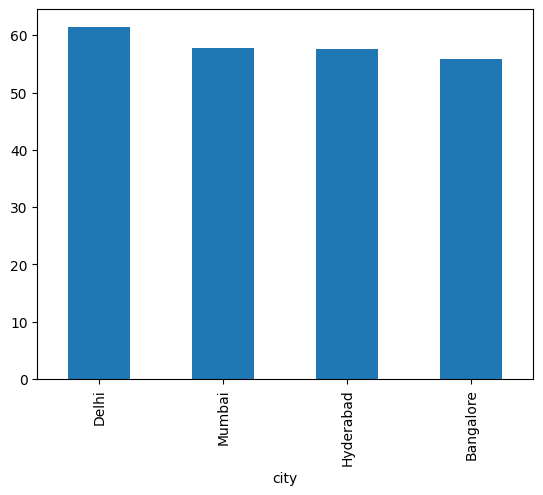

In [92]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

In [ ]:
#Printing revenue realized per city

In [94]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [95]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [96]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [98]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    415122840
Delhi        289472918
Hyderabad    325232870
Mumbai       629391323
Name: revenue_realized, dtype: int64

In [99]:
#Printing month by month revenue

In [100]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [101]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [102]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [103]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [105]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [106]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133070 entries, 0 to 133069
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133070 non-null  object 
 1   property_id        133070 non-null  int64  
 2   booking_date       133070 non-null  object 
 3   check_in_date      133070 non-null  object 
 4   checkout_date      133070 non-null  object 
 5   no_guests          133070 non-null  int64  
 6   room_category      133070 non-null  object 
 7   booking_platform   133070 non-null  object 
 8   ratings_given      56016 non-null   float64
 9   booking_status     133070 non-null  object 
 10  revenue_generated  133070 non-null  int64  
 11  revenue_realized   133070 non-null  int64  
 12  property_name      133070 non-null  object 
 13  category           133070 non-null  object 
 14  city               133070 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [107]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [108]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [109]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    556460174
Jun 22    537219271
May 22    565540506
Name: revenue_realized, dtype: int64

In [ ]:
#Printing revenue realized per hotel type

In [113]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [114]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     62430375
Atliq Grands     207800708
Atliq Bay        255735290
Atliq Blu        256643260
Atliq City       279554213
Atliq Palace     294193161
Atliq Exotica    302862944
Name: revenue_realized, dtype: int64

In [ ]:
#printing average rating per city

In [112]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

In [ ]:
#creating a pie chart of revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

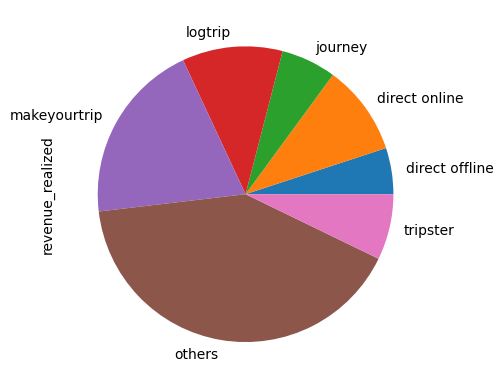

In [111]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")